In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD & REMOVE ID COLUMN
df = pd.read_csv('tweets.csv')
df = df.drop('id', axis=1)

In [51]:
# 2. MISSING DATA ANALYSIS
missing_data = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
print(missing_data)

           Missing_Count  Missing_Percentage
text                   0                 0.0
isRetweet              0                 0.0
isDeleted              0                 0.0
device                 0                 0.0
favorites              0                 0.0
retweets               0                 0.0
date                   0                 0.0
isFlagged              0                 0.0


In [52]:

# SUMMARY STATISTICS (NUMERICAL FEATURES)
print(df.describe())

          favorites       retweets
count  5.657100e+04   56571.000000
mean   2.834955e+04    8618.987467
std    5.781564e+04   13306.132408
min    0.000000e+00       0.000000
25%    1.000000e+01      59.000000
50%    1.640000e+02    3450.000000
75%    4.393850e+04   13014.500000
max    1.869706e+06  408866.000000


In [53]:
# SUMMARY STATISTICS (CATEGORICAL FEATURES)
for col in ['isRetweet', 'isDeleted', 'device', 'isFlagged']:
    print("-" * 40)
    print(df[col].value_counts())

----------------------------------------
isRetweet
f    46694
t     9877
Name: count, dtype: int64
----------------------------------------
isDeleted
f    55479
t     1092
Name: count, dtype: int64
----------------------------------------
device
Twitter for iPhone          27967
Twitter for Android         14545
Twitter Web Client          12182
TweetDeck                     482
TwitLonger Beta               405
Twitter Media Studio          375
Instagram                     133
Facebook                      105
Twitter for BlackBerry         97
Twitter Ads                    97
Twitter Web App                64
Twitter for iPad               60
Twitlonger                     23
Twitter QandA                  10
Vine - Make a Scene            10
Periscope                       7
Neatly For BlackBerry 10        5
Media Studio                    2
Twitter for Websites            1
Twitter Mirror for iPad         1
Name: count, dtype: int64
----------------------------------------
isFlagg

In [54]:
# TEXT COLUMN ANALYSIS
if 'text' in df.columns:
    df['text_length'] = df['text'].astype(str).str.len()
    print(f"Text length statistics:")
    print(df['text_length'].describe())


Text length statistics:
count    56571.000000
mean       127.784359
std         61.583693
min          2.000000
25%         92.000000
50%        132.000000
75%        142.000000
max        328.000000
Name: text_length, dtype: float64


In [55]:
# DATA QUALITY ISSUES

# CHECKS FOR DUPLICATE ROWS
duplicates = df.duplicated().sum()
if duplicates:
    print(f"Duplicate rows: {duplicates}")

# CHECKS FOR NEGATIVE VALUES
numerical_cols = ['favorites', 'retweets']
for col in numerical_cols:
    if col in df.columns:
        negative_count = (df[col] < 0).sum()
        if negative_count > 0:
            print(f" {col}: {negative_count} negative values detected")


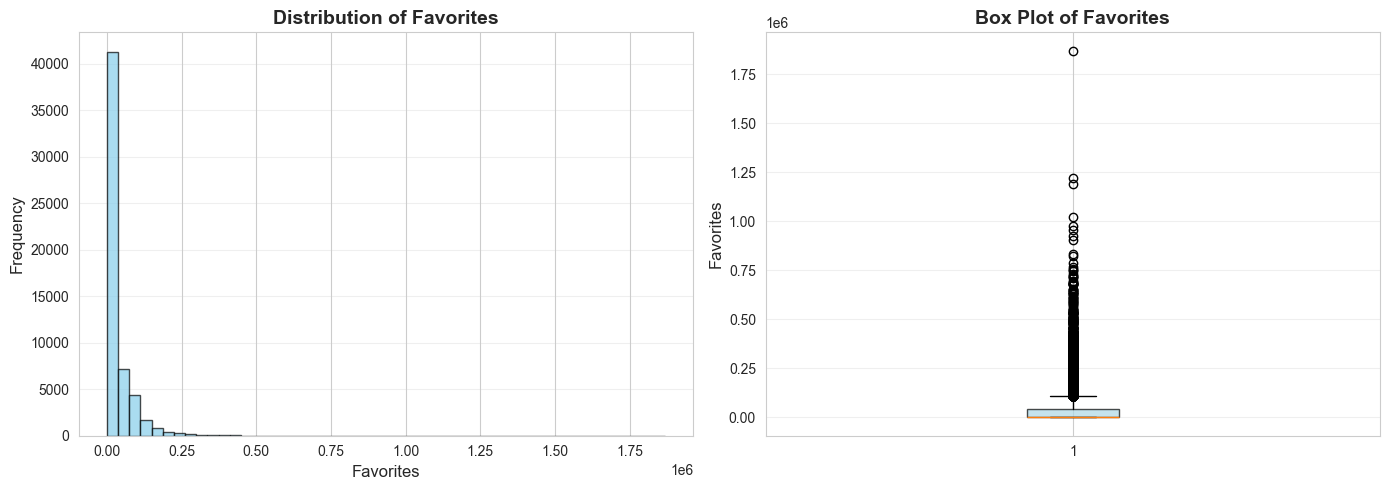

In [56]:
# VISUALISATION (FAVORITES)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.hist(df['favorites'].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Favorites', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Favorites', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df['favorites'].dropna(), vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7))
plt.ylabel('Favorites', fontsize=12)
plt.title('Box Plot of Favorites', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('favorites_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

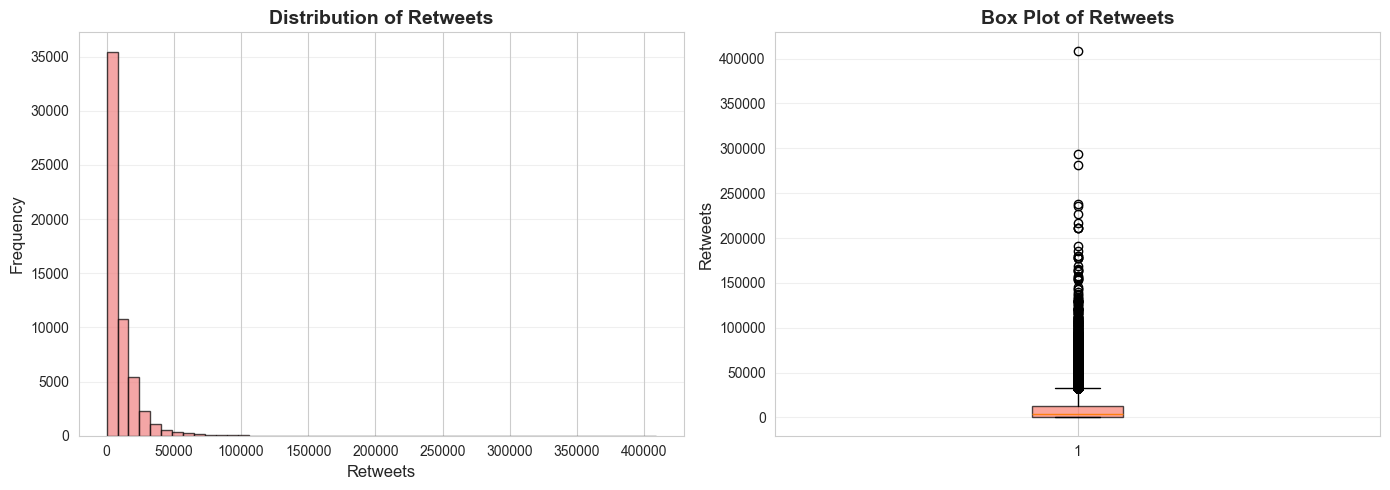

In [57]:
# VISUALISATION (RETWEETS)
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.hist(df['retweets'].dropna(), bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
plt.xlabel('Retweets', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Retweets', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df['retweets'].dropna(), vert=True, patch_artist=True,
            boxprops=dict(facecolor='salmon', alpha=0.7))
plt.ylabel('Retweets', fontsize=12)
plt.title('Box Plot of Retweets', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('retweets_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

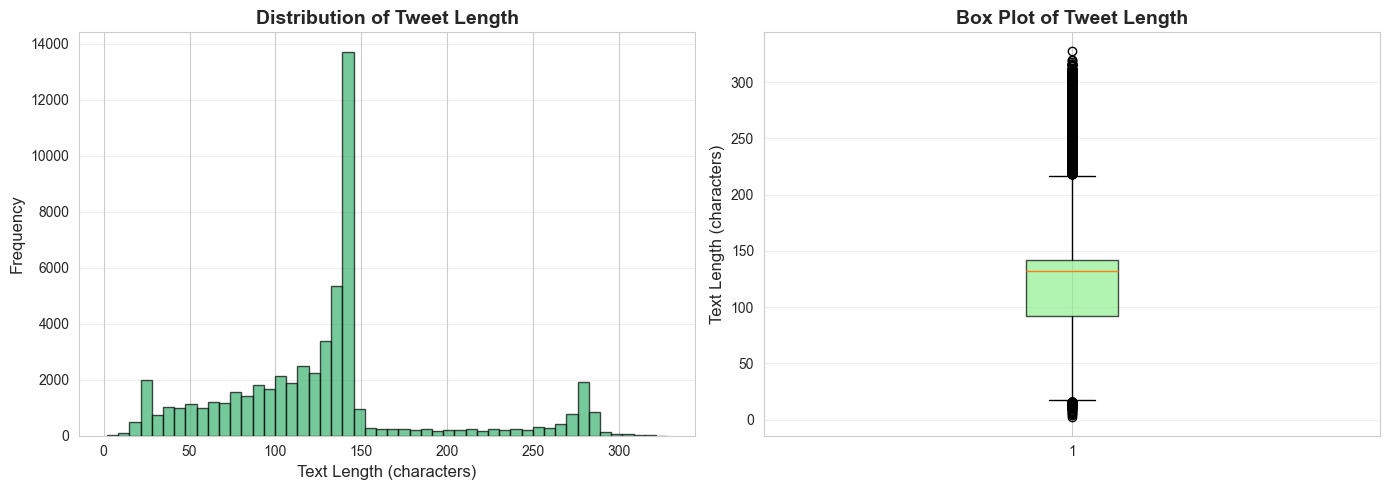

In [58]:
# VISUALISATION (TEXT LENGTH)
if 'text_length' in df.columns:
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.hist(df['text_length'].dropna(), bins=50, color='mediumseagreen', edgecolor='black', alpha=0.7)
    plt.xlabel('Text Length (characters)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Distribution of Tweet Length', fontsize=14, fontweight='bold')
    plt.grid(axis='y', alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.boxplot(df['text_length'].dropna(), vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightgreen', alpha=0.7))
    plt.ylabel('Text Length (characters)', fontsize=12)
    plt.title('Box Plot of Tweet Length', fontsize=14, fontweight='bold')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('text_length_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

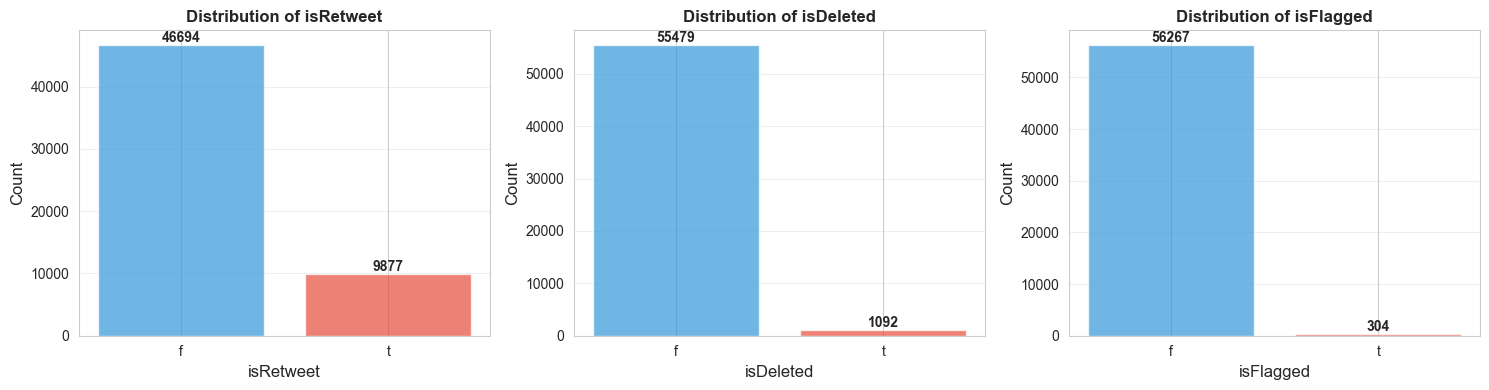

In [59]:
# VISUALISATION (BOOLEAN COLUMNS)
boolean_cols = ['isRetweet', 'isDeleted', 'isFlagged']
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for idx, col in enumerate(boolean_cols):
    if col in df.columns:
        counts = df[col].value_counts()
        axes[idx].bar(counts.index.astype(str), counts.values, color=['#3498db', '#e74c3c'], alpha=0.7)
        axes[idx].set_xlabel(col, fontsize=12)
        axes[idx].set_ylabel('Count', fontsize=12)
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].grid(axis='y', alpha=0.3)

        # Add value labels on bars
        for i, v in enumerate(counts.values):
            axes[idx].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('boolean_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

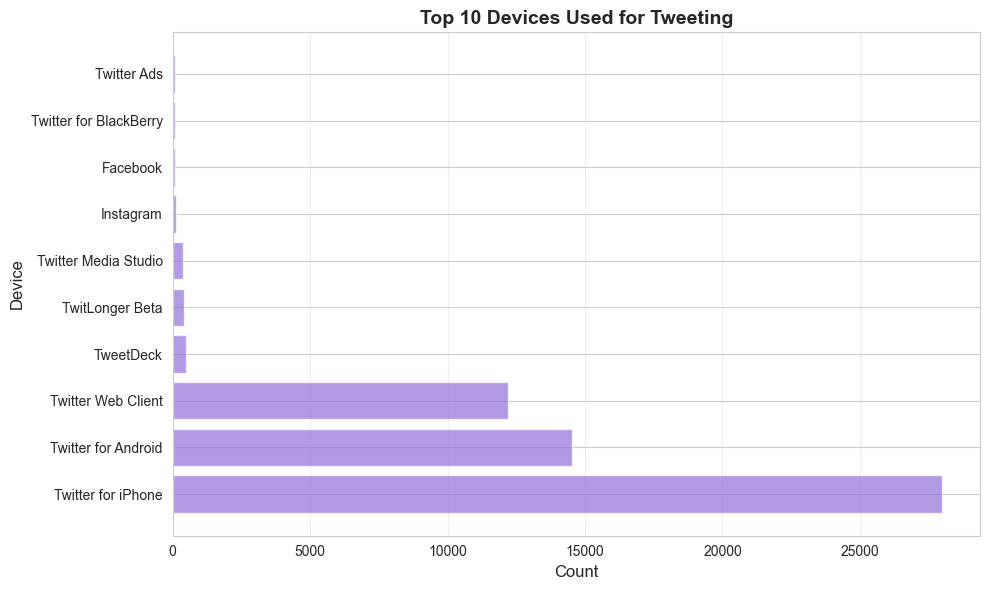

In [60]:
# VISUALISATION (DEVICE)
if 'device' in df.columns:
    plt.figure(figsize=(10, 6))
    device_counts = df['device'].value_counts().head(10)
    plt.barh(range(len(device_counts)), device_counts.values, color='mediumpurple', alpha=0.7)
    plt.yticks(range(len(device_counts)), device_counts.index)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Device', fontsize=12)
    plt.title('Top 10 Devices Used for Tweeting', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('device_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

In [61]:
# VISUALISATION (TIME)
if 'year' in df.columns:
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    year_counts = df['year'].value_counts().sort_index()
    plt.plot(year_counts.index, year_counts.values, marker='o', linewidth=2, markersize=8, color='darkorange')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Tweets', fontsize=12)
    plt.title('Tweets Over Time (by Year)', fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3)

    plt.subplot(1, 2, 2)
    if 'day_of_week' in df.columns:
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        day_counts = df['day_of_week'].value_counts().reindex(day_order)
        plt.bar(range(len(day_counts)), day_counts.values, color='steelblue', alpha=0.7)
        plt.xticks(range(len(day_counts)), day_counts.index, rotation=45, ha='right')
        plt.xlabel('Day of Week', fontsize=12)
        plt.ylabel('Number of Tweets', fontsize=12)
        plt.title('Tweets by Day of Week', fontsize=14, fontweight='bold')
        plt.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.savefig('temporal_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

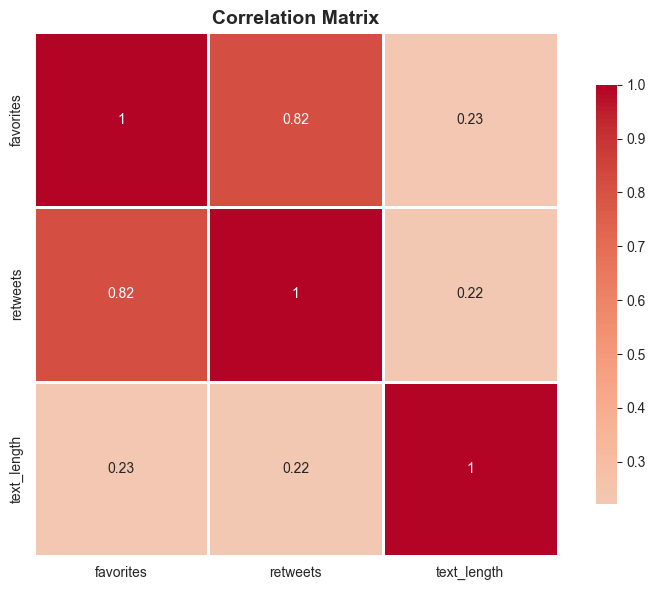

In [62]:
# VISUALISATION (CORRELATION)
numerical_data = df[['favorites', 'retweets', 'text_length']].dropna()
if not numerical_data.empty:
    plt.figure(figsize=(8, 6))
    correlation_matrix = numerical_data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()

In [66]:
import re

# PREPROCESSING RULES
def preprocess_tweet(text):
    """Clean and preprocess tweet text"""
    # LOWERCASE
    text = text.lower()
    # REMOVE URLS
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # REMOVE USER NAMES
    text = re.sub(r'@\w+', '', text)
    # REMOVE HASHTAGS (BUT KEEP TEXT)
    text = re.sub(r'#', '', text)
    # REMOVE PUNCTUATION
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # NORMALIZE WHITESPACE
    text = ' '.join(text.split())
    return text

# APPLY PREPROCESSING
df['text'] = df['text'].apply(preprocess_tweet)

# REMOVE EMPTY TEXT AFTER PREPROCESSING
df = df[df['text'].str.strip() != '']